# Facebook Data Crawling
In this notebook, we will be crawling data from Facebook using the Facebook Graph API. We will be using the facebook-scraper

## Install the required library
We will be using the facebook-scraper library to crawl data from Facebook. We will install this library using pip.

In [1]:
%pip install facebook_scraper pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 8.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 17.6 MB/s eta 0:00:0000

In [1]:
from facebook_scraper import get_posts
import pandas as pd
import numpy as np

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Crawl the data using facebook_scraper
Now we can get the data from Facebook using the facebook_scraper library. We will be using the get_posts function to get the posts from the fanpage. This function will return a list of dictionaries, where each dictionary represents a post. We will be saving this list of dictionaries to a json file. More information about what you can do with the facebook_scraper library can be found here: https://github.com/kevinzg/facebook-scraper

## Define variables
First we have to define some variables that we will be using throughout the notebook. 
- FANPAGE_LINK: The link to the fanpage that we want to crawl data from. This can be found by going to the fanpage and copying the link from the address bar. For example, the link to the fanpage of the [Nintendo Switch](https://www.facebook.com/NintendoSwitch/) is https://www.facebook.com/NintendoSwitch/. We will be using this link as the value for FANPAGE_LINK.

- COOKIE_PATH: The path to the cookie file that we will be using to authenticate with Facebook. This cookie file can be obtained by logging into Facebook and copying the cookie from the browser. For example, in Chromium, use extension [Get cookies.txt LOCALLY](https://chrome.google.com/webstore/detail/get-cookiestxt/bgaddhkoddajcdgocldbbfleckgcbcid) to get the cookie file. Then save the cookie to a file and use the path to this file as the value for COOKIE_PATH. <span style="color:red; font-weight:bold">USE COOKIE FROM A FAKE ACCOUNT, OTHERWISE YOUR REAL ACCOUNT MIGHT GET BANNED.</span>.


- FOLDER_NAME: The name of the folder that we will be saving the data to. This folder will be created in the same directory as this notebook.

In [15]:
FANPAGE_LINK ="ESPN"
FOLDER_PATH = "Data/"
COOKIE_PATH = "ckies.txt"

PAGES_NUMBER = 8 # Number of pages to crawl

In [16]:
post_list = []
for post in get_posts(FANPAGE_LINK,
                    options={"comments": True, "reactions": True, "allow_extra_requests": True},
                    extra_info=True, pages=PAGES_NUMBER, cookies=COOKIE_PATH):
    print(post)
    post_list.append(post)

{'post_id': '897833491712256', 'text': 'Nine days after being placed on paid leave, head gymnastics coach Tom Farden and the University of Utah have "mutually agreed to part ways," the university announced in a statement Tuesday.\n\nFarden\'s exit comes shortly after allegations of abuse from former Utah gymnasts Kara Eaker and Kim Tessen.\n\nESPN.COM\nFarden out as gymnastics coach, Utah announces', 'post_text': 'Nine days after being placed on paid leave, head gymnastics coach Tom Farden and the University of Utah have "mutually agreed to part ways," the university announced in a statement Tuesday.\n\nFarden\'s exit comes shortly after allegations of abuse from former Utah gymnasts Kara Eaker and Kim Tessen.', 'shared_text': 'ESPN.COM\nFarden out as gymnastics coach, Utah announces', 'original_text': None, 'time': datetime.datetime(2023, 11, 22, 14, 18, 19), 'timestamp': 1700662699, 'image': None, 'image_lowquality': 'https://external-xsp1-2.xx.fbcdn.net/emg1/v/t13/955092381190237723

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897586535070285', 'text': "EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴\n\nECU Men's Basketball", 'post_text': "EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴\n\nECU Men's Basketball", 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 22, 1, 56, 1), 'timestamp': 1700618161, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/403526572_312135211746296_2380332548022244907_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=Yk2wvkccmwgAX_x4Wi5&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAEKwuMUXMloVZn3pt4XXcojybzJIYf2WSWL1k4Gnz4Hg&oe=6562F746', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/403526572_312135211746296_2380332548022244907_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=Yk2wvkccmwgAX_x4Wi5&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-2

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)
Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/sit

{'post_id': '897546935074245', 'text': 'Here’s how the College Football Playoff rankings look heading into Rivalry Week 👀', 'post_text': 'Here’s how the College Football Playoff rankings look heading into Rivalry Week 👀', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 22, 0, 17, 40), 'timestamp': 1700612260, 'image': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t39.30808-6/404168591_897546918407580_358048866842557559_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=JnHnaO_d9S4AX_tN0r2&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-2.xx&oh=00_AfBsAs_NhOUp9gfcxQT9GVLbL6UqKbIvp6JniqV5L8s9FQ&oe=656232CF&manual_redirect=1', 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t39.30808-6/404168591_897546918407580_358048866842557559_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=JnHnaO_d9S4AX_tN0r2&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAa3nq5Ka4sBSgNPc5cZZ44s

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897472645081674', 'text': 'Shohei Ohtani wants to keep his free agency process private, per Jeff Passan. http://spr.ly/6180u4gM2\n\nShohei Ohtani muốn giữ quy trình đại lý miễn phí của mình riêng tư, mỗi Jeff Passan . http://spr.ly/6180u4gM2', 'post_text': 'Shohei Ohtani wants to keep his free agency process private, per Jeff Passan. http://spr.ly/6180u4gM2\n\nShohei Ohtani muốn giữ quy trình đại lý miễn phí của mình riêng tư, mỗi Jeff Passan . http://spr.ly/6180u4gM2', 'shared_text': '', 'original_text': 'Shohei Ohtani wants to keep his free agency process private, per Jeff Passan. http://spr.ly/6180u4gM2', 'time': datetime.datetime(2023, 11, 21, 19, 57, 43), 'timestamp': 1700596663, 'image': 'https://m.facebook.com/photo/view_full_size/?fbid=897472628415009&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY9JRhu9DSf7Jz6XETV-NZjvtF1S3qE1no_x2GtBm2UgpsasopluS1goHox2u4HrEYfCwJqQr-iOsciIu6CWJ0Tmc9e4TUfzrxY_Rg6-\\-\\-EJb

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897447995084139', 'text': "Breaking: Indianapolis Colts' LB Darius Shaquille Leonard announced he is being released.\n\nTin nóng: Indianapolis Colts ' LB Darius Shaquille Leonard thông báo anh ta sẽ được thả.", 'post_text': "Breaking: Indianapolis Colts' LB Darius Shaquille Leonard announced he is being released.\n\nTin nóng: Indianapolis Colts ' LB Darius Shaquille Leonard thông báo anh ta sẽ được thả.", 'shared_text': '', 'original_text': "Breaking: Indianapolis Colts' LB Darius Shaquille Leonard announced he is being released.", 'time': datetime.datetime(2023, 11, 21, 18, 50, 27), 'timestamp': 1700592627, 'image': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t39.30808-6/403722635_897447978417474_540133676631893540_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=oYwoIxbvZHgAX9HsoC5&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAGoDvxv2MqVuWKISuoW4myvWftcTwIv1S3nVqtQSKvWg&oe=6562EC37&manual_redirect=1', 'image_lowquality': 'https://scontent-xsp1-

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897435101752095', 'text': 'Prince Harry and Meghan Markle stopped by to celebrate the Invictus games while the Vancouver Canucks got the W 🏒', 'post_text': 'Prince Harry and Meghan Markle stopped by to celebrate the Invictus games while the Vancouver Canucks got the W 🏒', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 18, 15, 40), 'timestamp': 1700590540, 'image': None, 'image_lowquality': 'https://scontent-xsp2-1.xx.fbcdn.net/v/t15.5256-10/403321386_868397298001099_2819720733293400771_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=111&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=o7SYyyH92gUAX-X1NyK&_nc_ht=scontent-xsp2-1.xx&oh=00_AfDJ6IC8hbLmWAHVH_-wQhCVvrd6N5x8jSrk1OdIiKwryw&oe=6562DEFA', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp2-1.xx.fbcdn.net/v/t15.5256-10/403321386_868397298001099_2819720733293400771_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=111&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897119705116968', 'text': '“I could have probably thrown it a little bit shorter.”\n\nPatrick Mahomes on his near go-ahead TD to Maquez Valdes-Scantling 💯', 'post_text': '“I could have probably thrown it a little bit shorter.”\n\nPatrick Mahomes on his near go-ahead TD to Maquez Valdes-Scantling 💯', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 5, 31, 24), 'timestamp': 1700544684, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/403412845_1861368634260193_2706950441736225737_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=0iC4NjmvQxQAX_u5iBR&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-2.xx&oh=00_AfD12kpDq7yyLppswXjrcqR1C3QH9y2J7XJe7ZULaCKHXA&oe=65631A81', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/403412845_1861368634260193_2706950441736225737_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897104018451870', 'text': "The Philadelphia Eagles' victory post after beating The Kansas City Chiefs 😂\n\nBài đăng chiến thắng Philadelphia Eagles sau khi đánh bại The Kansas City Chiefs 😂", 'post_text': "The Philadelphia Eagles' victory post after beating The Kansas City Chiefs 😂\n\nBài đăng chiến thắng Philadelphia Eagles sau khi đánh bại The Kansas City Chiefs 😂", 'shared_text': '', 'original_text': "The Philadelphia Eagles' victory post after beating The Kansas City Chiefs 😂", 'time': datetime.datetime(2023, 11, 21, 4, 40, 5), 'timestamp': 1700541605, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t39.30808-6/404896487_897103995118539_6525994323278352954_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=2JgM7f8xjTcAX8wue1_&_nc_ht=scontent-xsp1-2.xx&oh=00_AfB7HYAXjqiMZCs5LUqJecxH0ftNoK9ptvMRFc2WXkojZQ&oe=6562D170', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-x

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897096411785964', 'text': '“Karma is the guy on the Eagles” 🦅\n\nPhiladelphia Eagles beat the Chiefs in the Super Bowl rematch!\n\n"Karma là chàng trai trên đại bàng" 🦅\n\nPhiladelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!', 'post_text': '“Karma is the guy on the Eagles” 🦅\n\nPhiladelphia Eagles beat the Chiefs in the Super Bowl rematch!\n\n"Karma là chàng trai trên đại bàng" 🦅\n\nPhiladelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!', 'shared_text': '', 'original_text': '“Karma is the guy on the Eagles” 🦅\n\nPhiladelphia Eagles beat the Chiefs in the Super Bowl rematch!', 'time': datetime.datetime(2023, 11, 21, 4, 20, 57), 'timestamp': 1700540457, 'image': 'https://m.facebook.com/photo/view_full_size/?fbid=897096395119299&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY-Yj_oDFiwOx_JF4n5uDcByNNgg6KcFefyFk_gs8chmpCs5QSlp5csAM2xK1gKJCiW3VkjcAdu_iecccFEOfVQaYNJE0FX1GiZsgFE8cm-AQPNr9

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897096081785997', 'text': 'Chiefs had a chance to score the go-ahead TD on this play 😬\n\nCác thủ lĩnh đã có cơ hội ghi bàn TD trên trận đấu này 😬', 'post_text': 'Chiefs had a chance to score the go-ahead TD on this play 😬\n\nCác thủ lĩnh đã có cơ hội ghi bàn TD trên trận đấu này 😬', 'shared_text': '', 'original_text': 'Chiefs had a chance to score the go-ahead TD on this play 😬', 'time': datetime.datetime(2023, 11, 21, 4, 20, 26), 'timestamp': 1700540426, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/371154920_650037477202491_5998156002479961470_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=1&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=j1611ZcN3h4AX8o0TYS&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAECq2IiaHGujbNx9LrFFF-GsT38np31mSJ-LnNDI-K5g&oe=65637C7A', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/371154920_650037477202491_5998156002479961470_n.jpg?stp=cp0_dst-jpg_e

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897075761788029', 'text': 'WE GOT A BALL GAME‼️\n\nJalen Hurts scores on the QB keeper 💨 Philadelphia Eagles', 'post_text': 'WE GOT A BALL GAME‼️\n\nJalen Hurts scores on the QB keeper 💨 Philadelphia Eagles', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 3, 28, 39), 'timestamp': 1700537319, 'image': None, 'image_lowquality': 'https://scontent-xsp1-3.xx.fbcdn.net/v/t15.5256-10/386466461_1114085269577439_5845301198380645428_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=109&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=_0lfU1bHHJYAX-A7b8Z&_nc_ht=scontent-xsp1-3.xx&oh=00_AfBosp2pk2LP8f0Axg8-Z-s7-HHoxWFrMCsAF-yOE_8Qdw&oe=65632BBD', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-3.xx.fbcdn.net/v/t15.5256-10/386466461_1114085269577439_5845301198380645428_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=109&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=_0lfU1bHHJYAX-A7b8Z&_nc_ht=scontent-xsp1-3.xx&oh=00_A

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)
Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/sit

{'post_id': '897058055123133', 'text': 'MAHOMES TO KELCE CONNECTION 🍿\n\nThe Kansas City Chiefs | 📺 ESPN/ABC/ESPN+', 'post_text': 'MAHOMES TO KELCE CONNECTION 🍿\n\nThe Kansas City Chiefs | 📺 ESPN/ABC/ESPN+', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 2, 35, 11), 'timestamp': 1700534111, 'image': None, 'image_lowquality': 'https://scontent-xsp1-3.xx.fbcdn.net/v/t15.5256-10/386467301_719977180023689_2660369688831967300_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=100&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=CDfAIxacgJoAX-NCBdb&_nc_ht=scontent-xsp1-3.xx&oh=00_AfC7wS-4KO5Q6xDnGA9gkR72kppPaZWSJguwBTtyqkRPTg&oe=6563827C', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-3.xx.fbcdn.net/v/t15.5256-10/386467301_719977180023689_2660369688831967300_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=100&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=CDfAIxacgJoAX-NCBdb&_nc_ht=scontent-xsp1-3.xx&oh=00_AfC7wS-4KO5Q6xDnG

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897053651790240', 'text': "No. 16 Kentucky survives an OT thriller against Saint Joseph's 😤\n\nSố 16 Kentucky sống sót sau một trận gây rùng mình trước Saint Joseph's 😤", 'post_text': "No. 16 Kentucky survives an OT thriller against Saint Joseph's 😤\n\nSố 16 Kentucky sống sót sau một trận gây rùng mình trước Saint Joseph's 😤", 'shared_text': '', 'original_text': "No. 16 Kentucky survives an OT thriller against Saint Joseph's 😤", 'time': datetime.datetime(2023, 11, 21, 2, 20, 43), 'timestamp': 1700533243, 'image': 'https://m.facebook.com/photo/view_full_size/?fbid=897053635123575&ref_component=mbasic_photo_permalink&ref_page=%2Fwap%2Fphoto.php&refid=13&_ft_=encrypted_tracking_data.0AY84wfa37Xi4ih_f5rdRtzUrv4poibC0wzvENdiINGJ2aWEKpwYyZlaNJ2pMbKdZ_r739IvxiSHscgWK2b-H-6-nxEdROl2qyfu_J65HsXXvz1Lou19Rb20XykhNkAkOdKnTEeK16zB2lTGtrCpJ7oUyXZieIcU07JvfD720SmU_5O84ISOr0WGwC4wpziqW7WHHnJHFhcleMOPmRRWbGIMcwFisVIZPytag2kU9XdIDsOIPHfrN_ZCebQQGlIdyZftfgTDjwInNlJyHyrc7VKe0blMAA8qn5W0B25cOO

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897050365123902', 'text': 'SNEED PICKS OFF JALEN HURTS 😮\n\nThe Kansas City Chiefs | 📺 ESPN/ABC/ESPN+', 'post_text': 'SNEED PICKS OFF JALEN HURTS 😮\n\nThe Kansas City Chiefs | 📺 ESPN/ABC/ESPN+', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 2, 12, 4), 'timestamp': 1700532724, 'image': None, 'image_lowquality': 'https://scontent-xsp2-1.xx.fbcdn.net/v/t15.5256-10/403321393_314541018022658_6361654267697349128_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=106&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=IzGBFVsZVX4AX9SeQWA&_nc_ht=scontent-xsp2-1.xx&oh=00_AfCso2h27pRJwxm_zIRJPzD20TnBlXnLA1VddLwioMPL0Q&oe=65624CE8', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp2-1.xx.fbcdn.net/v/t15.5256-10/403321393_314541018022658_6361654267697349128_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=106&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=IzGBFVsZVX4AX9SeQWA&_nc_ht=scontent-xsp2-1.xx&oh=00_AfCso2h27pRJwxm_zI

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897032365125702', 'text': 'Travis Kelce and The Kansas City Chiefs are ready 😤', 'post_text': 'Travis Kelce and The Kansas City Chiefs are ready 😤', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 1, 20, 30), 'timestamp': 1700529630, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/386429662_1029604508259566_6861919979538408887_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=101&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=vyzt8139_f8AX8Li-I9&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAtl1nV8V0rE_VAxVslqSYVn65XnlPhsDSnOrq_XaNTAg&oe=6562A300', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/386429662_1029604508259566_6861919979538408887_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=101&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=vyzt8139_f8AX8Li-I9&_nc_ht=scontent-xsp1-2.xx&oh=00_AfAtl1nV8V0rE_VAxVslqSYVn65XnlPhsDSnOrq_XaNTAg&oe=6562A300'],

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897027715126167', 'text': 'The Kelce brothers are on top of the NFL world 💪\n\nThe people who have coached both explain how Travis Kelce and Jason Kelce have reached new heights 👀', 'post_text': 'The Kelce brothers are on top of the NFL world 💪\n\nThe people who have coached both explain how Travis Kelce and Jason Kelce have reached new heights 👀', 'shared_text': '', 'original_text': None, 'time': datetime.datetime(2023, 11, 21, 1, 6, 15), 'timestamp': 1700528775, 'image': None, 'image_lowquality': 'https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/370118277_3572746002981538_2157568254124193468_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=110&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=0sZzri7U9DoAX-5qrO9&_nc_ht=scontent-xsp1-2.xx&oh=00_AfBcD_tESjp0rt3w4Ph929mJHz2yDtB-oayFh6rfkHsN4g&oe=6563ADC3', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp1-2.xx.fbcdn.net/v/t15.5256-10/370118277_3572746002981538_2157568254124193468_n.jpg?stp=c

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 708, in extract_reactors
    data = json.loads(response.text[prefix_length:])  # Strip 'for (;;);'
  File "/home/codespace/.python/current/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/home/codespace/.python/current/lib/python3.10/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 2 (char 1)


{'post_id': '897025301793075', 'text': 'Mahomes embraces his wife before Philadelphia Eagles-The Kansas City Chiefs ❤️\n\nMahomes ôm vợ trước Philadelphia Eagles - The Kansas City Chiefs ❤️', 'post_text': 'Mahomes embraces his wife before Philadelphia Eagles-The Kansas City Chiefs ❤️\n\nMahomes ôm vợ trước Philadelphia Eagles - The Kansas City Chiefs ❤️', 'shared_text': '', 'original_text': 'Mahomes embraces his wife before Philadelphia Eagles-The Kansas City Chiefs ❤️', 'time': datetime.datetime(2023, 11, 21, 0, 59, 9), 'timestamp': 1700528349, 'image': None, 'image_lowquality': 'https://scontent-xsp1-1.xx.fbcdn.net/v/t15.5256-10/403599864_859996855855794_1439404430071496774_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=105&ccb=1-7&_nc_sid=f3b36a&efg=eyJpIjoidCJ9&_nc_ohc=-ZR2lCoQBWIAX9Tasn6&tn=KSwwSRy5OD-GvW_m&_nc_ht=scontent-xsp1-1.xx&oh=00_AfBCO0_erbSNETGZa3Or3BoWndIX-BWuy5C47bNpHhOL0Q&oe=65631CE1', 'images': [], 'images_description': [], 'images_lowquality': ['https://scontent-xsp

Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 1140, in extract_comment_replies
    for action in data['payload']['actions']:
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume
    for item in generator:
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/extractors.py", line 1140, in extract_comment_replies
    for action in data['payload']['actions']:
TypeError: 'NoneType' object is not subscriptable
Traceback (most recent call last):
  File "/home/codespace/.python/current/lib/python3.10/site-packages/facebook_scraper/utils.py", line 279, in safe_consume


{'post_id': '895298335299105', 'text': 'A jury sentenced Kaitlin Armstrong to 90 years in prison for the May 2022 murder of professional cyclist Anna "Mo" Wilson.\n\nThe case launched a 43-day international search for the killer, who prosecutors say gunned down Wilson in a jealous rage.\n\nESPN.COM\nWoman gets 90 years for murder of cyclist Wilson', 'post_text': 'A jury sentenced Kaitlin Armstrong to 90 years in prison for the May 2022 murder of professional cyclist Anna "Mo" Wilson.\n\nThe case launched a 43-day international search for the killer, who prosecutors say gunned down Wilson in a jealous rage.', 'shared_text': 'ESPN.COM\nWoman gets 90 years for murder of cyclist Wilson', 'original_text': None, 'time': datetime.datetime(2023, 11, 17, 22, 1, 23), 'timestamp': 1700258483, 'image': None, 'image_lowquality': 'https://external-xsp1-2.xx.fbcdn.net/emg1/v/t13/16599145897668237552?url=https%3A%2F%2Fa1.espncdn.com%2Fcombiner%2Fi%3Fimg%3D%252Fphoto%252F2023%252F1027%252Fr1244625_1296

## Convert list of dicts to df

Now we can convert the list of dictionaries to a pandas dataframe. We will be using the pandas library to do this. We will also be saving the dataframe to a xlxs or csv file.

In [17]:
# Initialize dataframe to scrape Facebook post
post_df_full = pd.DataFrame(columns=post_list[0].keys(), index=range(len(post_list)), data=post_list)

# To df
path=FOLDER_PATH + FANPAGE_LINK + ".csv"
post_df_full.to_csv(path, index=False)
print(path)

Data/ESPN.csv


In [18]:
post_df_full

post_id                                               text  \
0    897833491712256  Nine days after being placed on paid leave, he...   
1    897586535070285  EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...   
2   1766045677171890  Welcome back to another episode of Rankings Re...   
3    897546935074245  Here’s how the College Football Playoff rankin...   
4    897472645081674  Shohei Ohtani wants to keep his free agency pr...   
..               ...                                                ...   
75   894170685411870  Michael Vick is OFFICIALLY the Madden GOAT, an...   
76   894044628757809  Breaking: Deshaun Watson will undergo season-e...   
77   893845458777726  The Denver Nuggets hold off the L.A. Clippers ...   
78   893834682112137  Hunter Dickinson came up HUGE in the Kansas Me...   
79   893804612115144  The Golden State Warriors and Minnesota Timber...   

                                            post_text  \
0   Nine days after being placed on paid leave, he...   
1   EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...   
2   Welcome back to another episode of Rankings Re...   
3   Here’s how the College Football Playoff rankin...   
4   Shohei Ohtani wants to keep his free agency pr...   
..                                                ...   
75  Michael Vick is OFFICIALLY the Madden GOAT, an...   
76  Breaking: Deshaun Watson will undergo season-e...   
77  The Denver Nuggets hold off the L.A. Clippers ...   
78  Hunter Dickinson came up HUGE in the Kansas Me...   
79  The Golden State Warriors and Minnesota Timber...   

                                          shared_text  \
0   ESPN.COM\nFarden out as gymnastics coach, Utah...   
1                                                       
2                                                       
3                                                       
4                                                       
..                                                ...   
75                                                      
76                                                      
77                                                      
78                                                      
79                                                      

                                        original_text                time  \
0                                                None 2023-11-22 14:18:19   
1                                                None 2023-11-22 01:56:01   
2                                                None 2023-11-22 00:58:55   
3                                                None 2023-11-22 00:17:40   
4   Shohei Ohtani wants to keep his free agency pr... 2023-11-21 19:57:43   
..                                                ...                 ...   
75  Michael Vick is OFFICIALLY the Madden GOAT, an... 2023-11-15 18:15:08   
76  Breaking: Deshaun Watson will undergo season-e... 2023-11-15 13:55:03   
77  The Denver Nuggets hold off the L.A. Clippers ... 2023-11-15 05:42:19   
78  Hunter Dickinson came up HUGE in the Kansas Me... 2023-11-15 05:08:12   
79  The Golden State Warriors and Minnesota Timber... 2023-11-15 03:32:56   

     timestamp                                              image  \
0   1700662699                                               None   
1   1700618161                                               None   
2   1700614735                                               None   
3   1700612260  https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...   
4   1700596663  https://m.facebook.com/photo/view_full_size/?f...   
..         ...                                                ...   
75  1700072108  https://scontent-xsp1-1.xx.fbcdn.net/v/t39.308...   
76  1700056503  https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...   
77  1700026939  https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...   
78  1700024892  https://m.facebook.com/photo/view_full_size/?f...   
79  1700019176                                            

In [2]:
espn_df=pd.read_csv('/workspaces/final-project-22022658NguyenTienKhoi/Data/ESPN.csv')

In [6]:
espn_df

post_id                                               text  \
0    897833491712256  Nine days after being placed on paid leave, he...   
1    897586535070285  EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...   
2   1766045677171890  Welcome back to another episode of Rankings Re...   
3    897546935074245  Here’s how the College Football Playoff rankin...   
4    897472645081674  Shohei Ohtani wants to keep his free agency pr...   
..               ...                                                ...   
75   894170685411870  Michael Vick is OFFICIALLY the Madden GOAT, an...   
76   894044628757809  Breaking: Deshaun Watson will undergo season-e...   
77   893845458777726  The Denver Nuggets hold off the L.A. Clippers ...   
78   893834682112137  Hunter Dickinson came up HUGE in the Kansas Me...   
79   893804612115144  The Golden State Warriors and Minnesota Timber...   

                                            post_text  \
0   Nine days after being placed on paid leave, he...   
1   EAST CAROLINA WINS IT ON THE HALFCOURT HEAVE 🎴...   
2   Welcome back to another episode of Rankings Re...   
3   Here’s how the College Football Playoff rankin...   
4   Shohei Ohtani wants to keep his free agency pr...   
..                                                ...   
75  Michael Vick is OFFICIALLY the Madden GOAT, an...   
76  Breaking: Deshaun Watson will undergo season-e...   
77  The Denver Nuggets hold off the L.A. Clippers ...   
78  Hunter Dickinson came up HUGE in the Kansas Me...   
79  The Golden State Warriors and Minnesota Timber...   

                                          shared_text  \
0   ESPN.COM\nFarden out as gymnastics coach, Utah...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
75                                                NaN   
76                                                NaN   
77                                                NaN   
78                                                NaN   
79                                                NaN   

                                        original_text                 time  \
0                                                 NaN  2023-11-22 14:18:19   
1                                                 NaN  2023-11-22 01:56:01   
2                                                 NaN  2023-11-22 00:58:55   
3                                                 NaN  2023-11-22 00:17:40   
4   Shohei Ohtani wants to keep his free agency pr...  2023-11-21 19:57:43   
..                                                ...                  ...   
75  Michael Vick is OFFICIALLY the Madden GOAT, an...  2023-11-15 18:15:08   
76  Breaking: Deshaun Watson will undergo season-e...  2023-11-15 13:55:03   
77  The Denver Nuggets hold off the L.A. Clippers ...  2023-11-15 05:42:19   
78  Hunter Dickinson came up HUGE in the Kansas Me...  2023-11-15 05:08:12   
79  The Golden State Warriors and Minnesota Timber...  2023-11-15 03:32:56   

     timestamp                                              image  \
0   1700662699                                                NaN   
1   1700618161                                                NaN   
2   1700614735                                                NaN   
3   1700612260  https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...   
4   1700596663  https://m.facebook.com/photo/view_full_size/?f...   
..         ...                                                ...   
75  1700072108  https://scontent-xsp1-1.xx.fbcdn.net/v/t39.308...   
76  1700056503  https://scontent-xsp2-1.xx.fbcdn.net/v/t39.308...   
77  1700026939  https://scontent-xsp1-2.xx.fbcdn.net/v/t39.308...   
78  1700024892  https://m.facebook.com/photo/view_full_size/?f...   
79  1700019176                                

In [3]:
processed_df = espn_df.dropna(subset='reactions')

In [21]:
fifth = espn_df.iloc[4]
reactions = dict(eval(fifth['reactions']))
reactions['thích']+reactions['yêu thích']+reactions['haha']+reactions['wow']+reactions['thương thương']+reactions['buồn']+reactions['phẫn nộ']

9942

<Axes: >

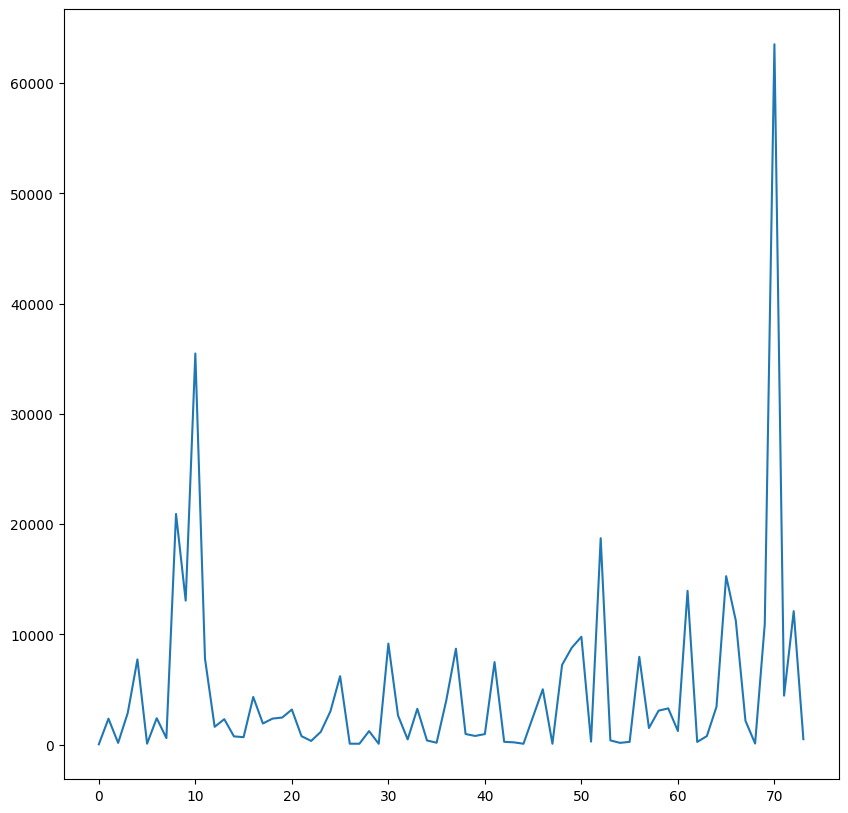

In [4]:
reactions = processed_df['reactions']
like = []
for i in range(74):
    tenth = dict(eval(reactions.iloc[i]))
    like.append(tenth['thích'])
series_like = pd.Series(like)
series_like.plot(kind='line',figsize=(10,10))

In [5]:
series_like.mean()

5052.851351351352

In [6]:
series_like.iloc[70]
processed_df.iloc[70]['text']

'This Native American Heritage Month, we celebrate the unparalleled achievements of Jim Thorpe, a member of the Sac and Fox Nation 🙌'